#                             LOAN DEFAULTER PREDICTION

## About Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import probplot

Loading Dataset

In [2]:
df=pd.read_csv("D:\\DATASCIENCE WITH PYTHON\\PROJECT\\SAMPLE LOAN\\Training Data.csv")

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


Exploratory Data Analysis - EDA

In [4]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
df.shape

(252000, 13)

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [9]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [12]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [13]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<AxesSubplot:>

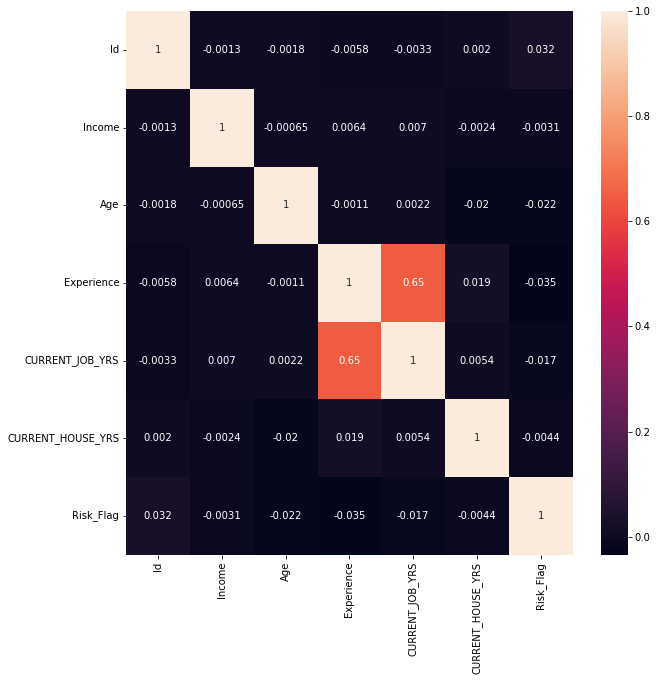

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

Data Visualising

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

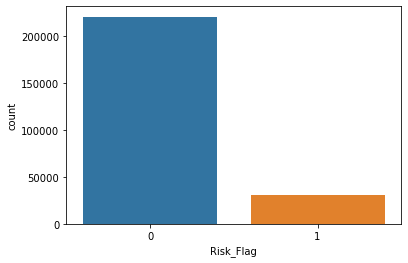

In [15]:
sns.countplot(df["Risk_Flag"],)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>],
       [<AxesSubplot:title={'center':'Risk_Flag'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

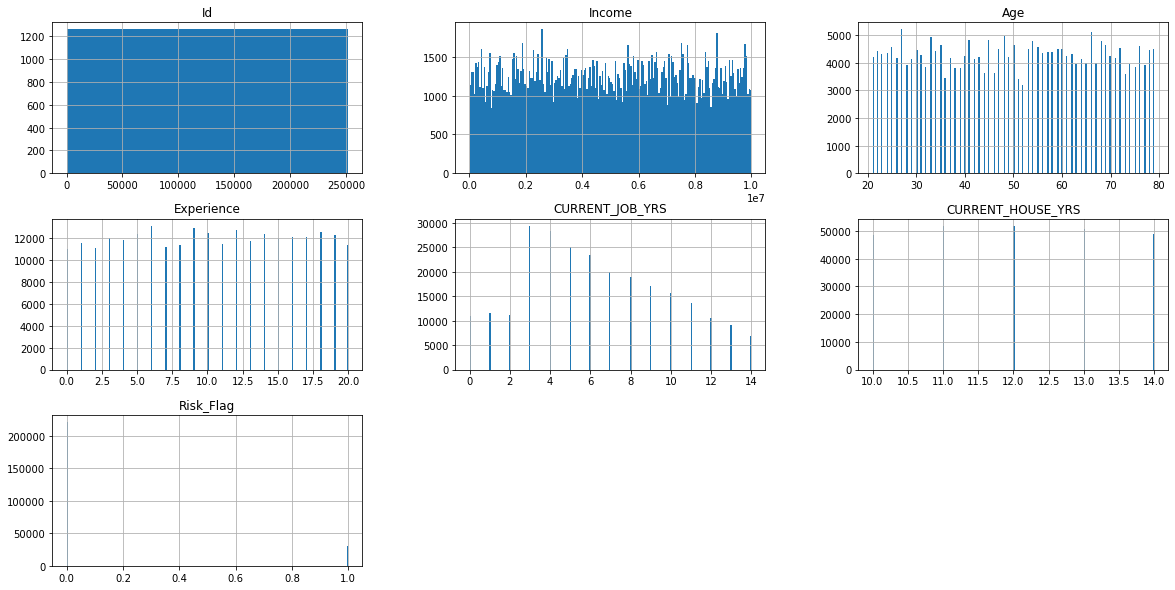

In [16]:
df.hist(bins=200,figsize=[20,10])

<Figure size 1440x864 with 0 Axes>

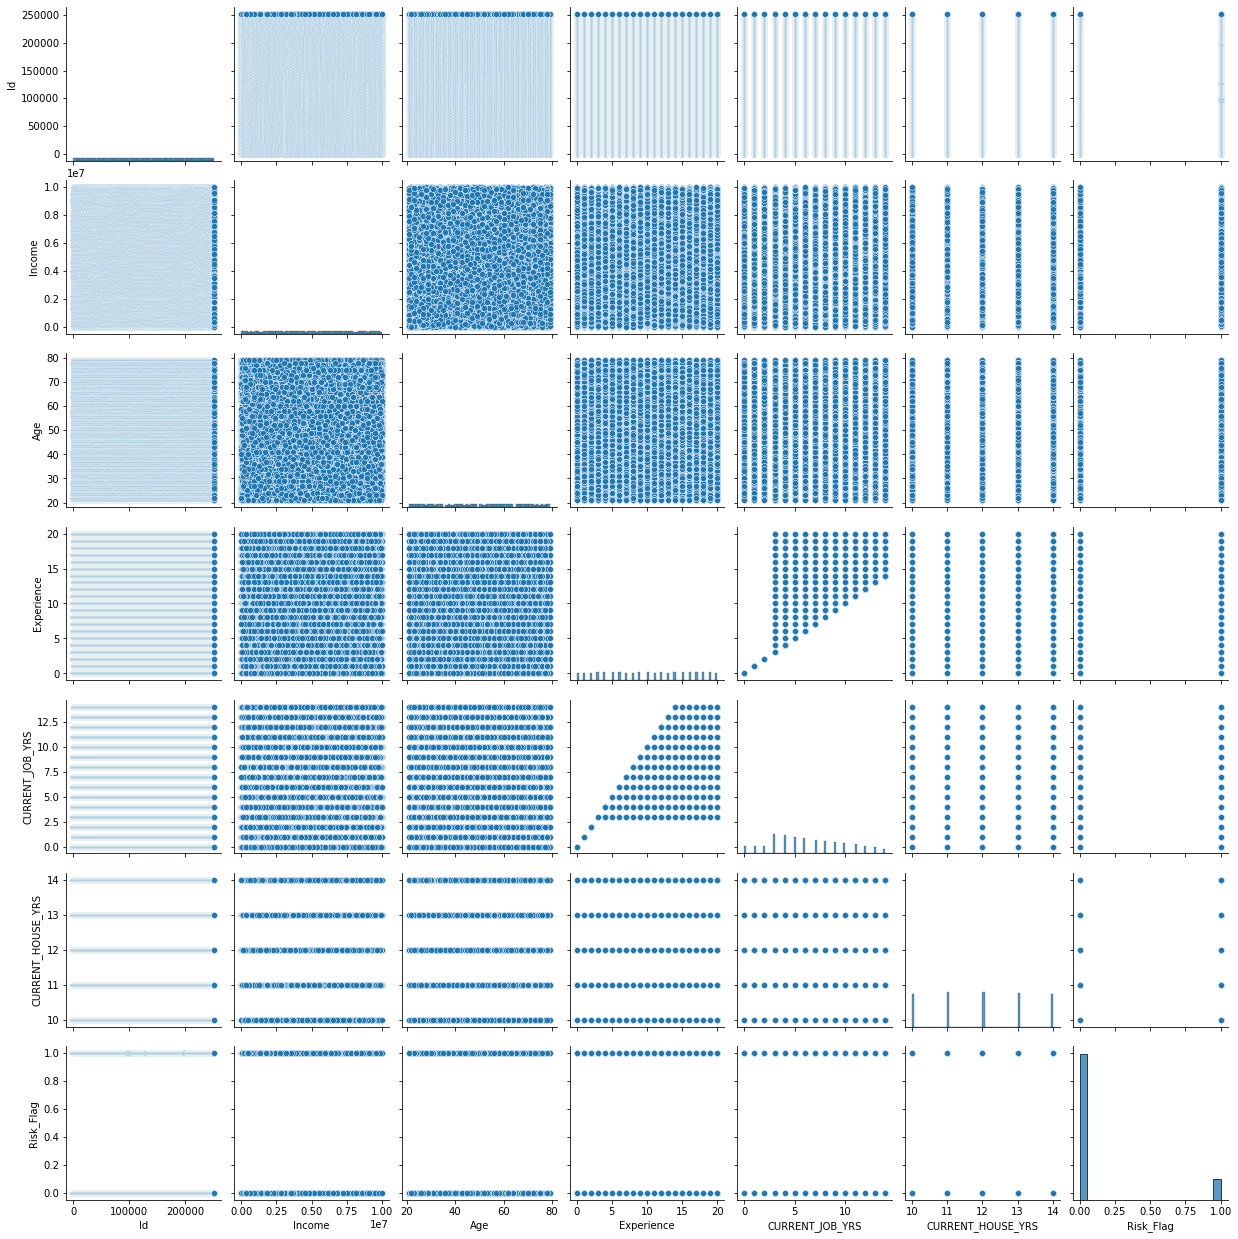

In [17]:
plt.figure(figsize=(20,12))
sns.pairplot(data=df);

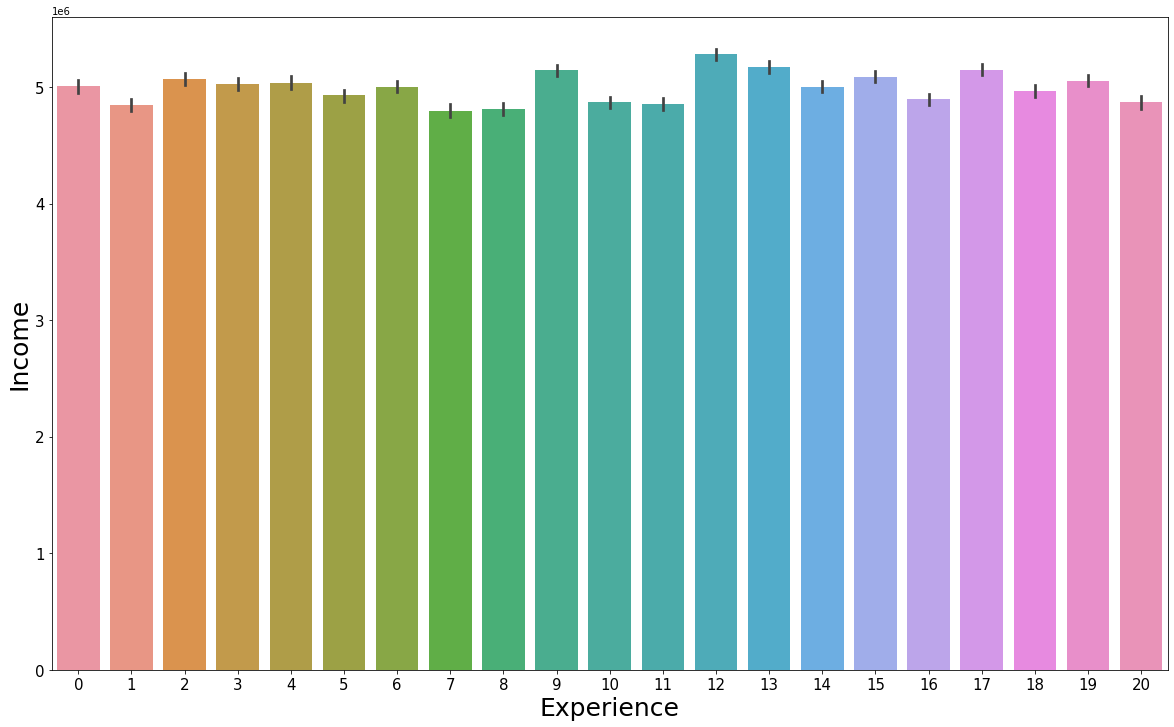

In [18]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,x='Experience',y='Income')
plt.style.use('ggplot')
plt.xlabel('Experience',fontsize=25);
plt.ylabel('Income',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)

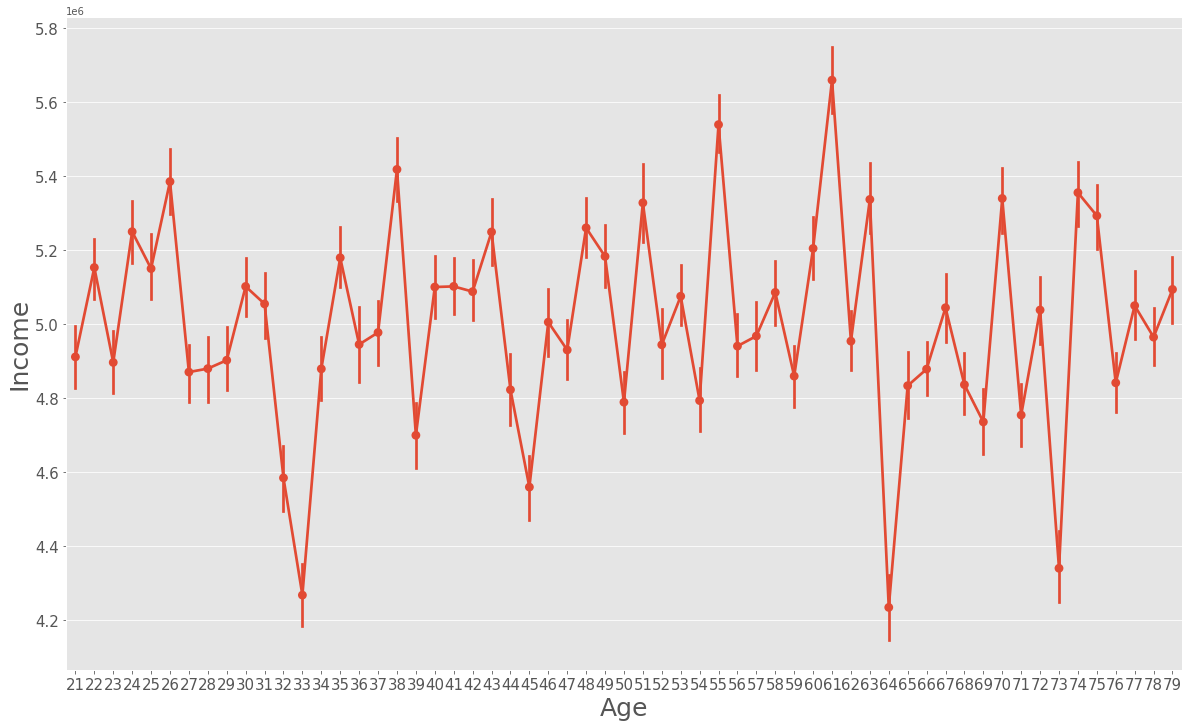

In [19]:
plt.figure(figsize=(20,12))
sns.pointplot(data=df,x='Age',y='Income');
plt.xlabel('Age',fontsize=25);
plt.ylabel('Income',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)

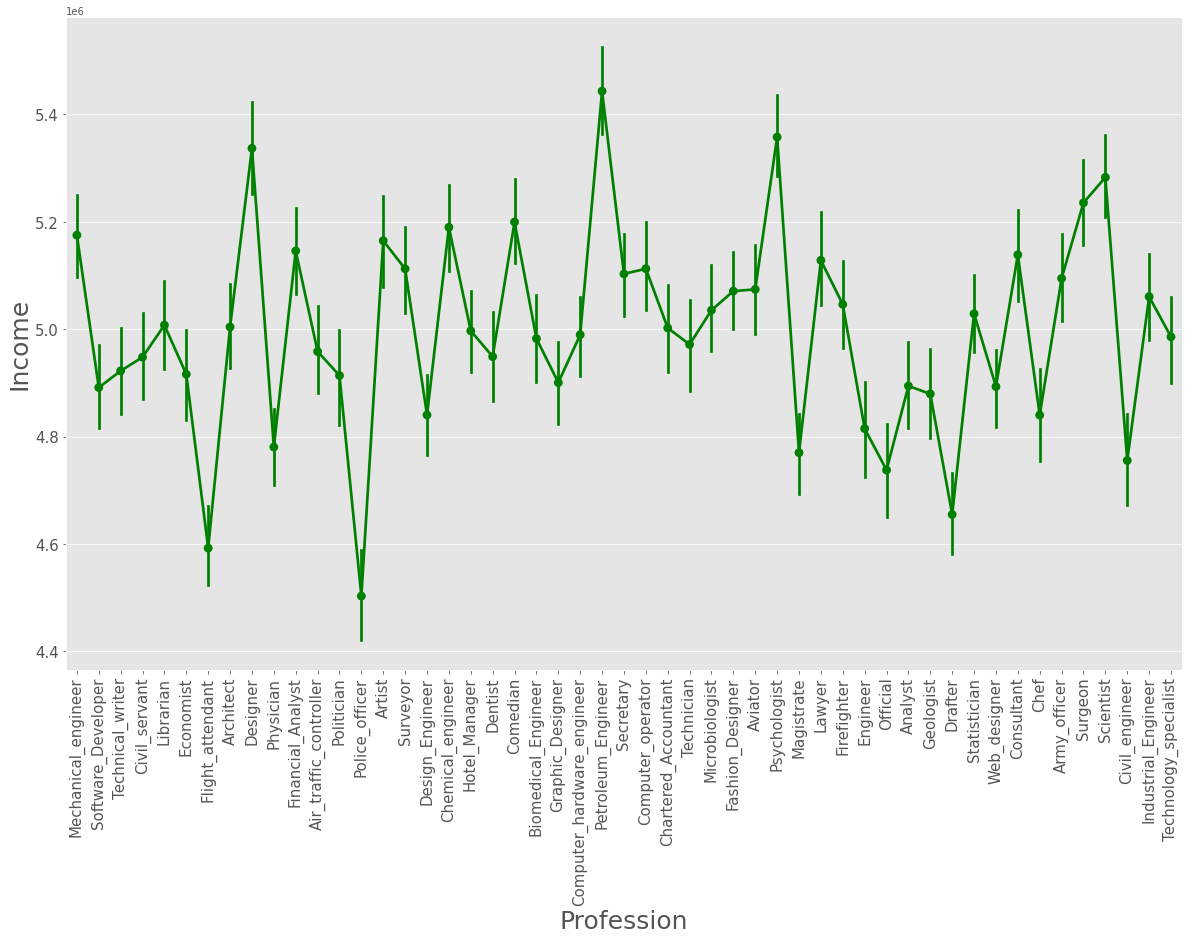

In [20]:
plt.figure(figsize=(20,12))
sns.pointplot(data=df,x='Profession',y='Income',color='green');
plt.tick_params(which='major',rotation=90,axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)
plt.xlabel('Profession',fontsize=25);
plt.ylabel('Income',fontsize=25);

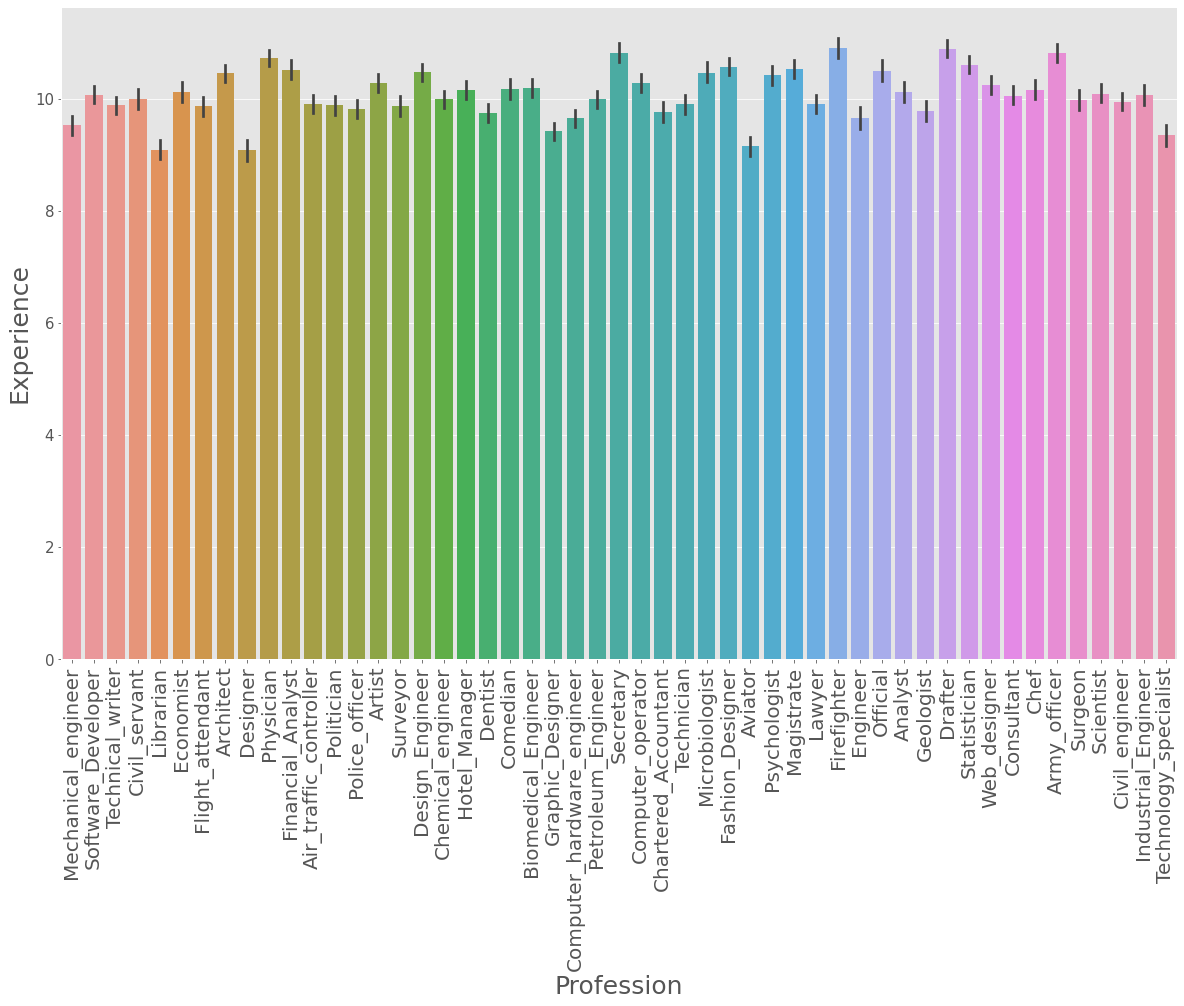

In [21]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,x='Profession',y='Experience');
plt.tick_params(which='major',rotation=90,axis='x',labelsize=20)
plt.tick_params(which='major',axis='y',labelsize=15)
plt.xlabel('Profession',fontsize=25);
plt.ylabel('Experience',fontsize=25);

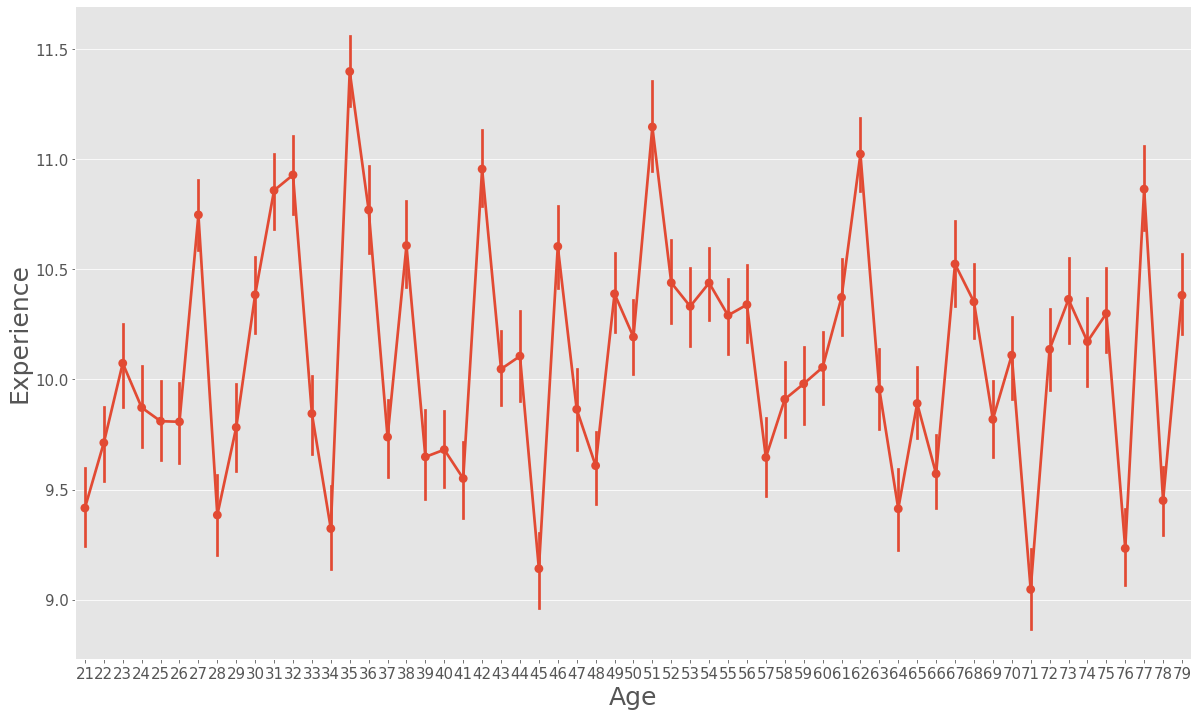

In [22]:
plt.figure(figsize=(20,12))
sns.pointplot(data=df,x='Age',y='Experience');
plt.xlabel('Age',fontsize=25);
plt.ylabel('Experience',fontsize=25);
plt.tick_params(which='major',axis='x',labelsize=15)
plt.tick_params(which='major',axis='y',labelsize=15)

Preparing the Data for training

Removing the column ID,CITY,STATE

In [23]:
df=df.drop(columns=['Id','CITY','STATE'])

In [24]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,0,10,0


In [25]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Discrete feature Count 4
Continuous feature Count 2
Categorical feature Count 4


In [26]:
print(categorical_feature)

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']


In [27]:
print(numerical_feature)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


In [28]:
print(continuous_feature)

['Income', 'Age']


In [29]:
print(discrete_feature)

['Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


In [30]:
df["Income"].value_counts()

7936020    77
9775375    71
1996629    71
9345456    70
1886371    40
           ..
8927336     1
5656901     1
8171741     1
3164826     1
9070230     1
Name: Income, Length: 41920, dtype: int64

In [31]:
df["Age"].value_counts()

27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916
28    3901
32    3834
75    3829
39    3800
38    3793
46    3627
44    3622
73    3569
36    3444
51    3397
52    3197
Name: Age, dtype: int64

In [32]:
df["Experience"].value_counts()

6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: Experience, dtype: int64

In [33]:
df["CURRENT_JOB_YRS"].value_counts()

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64

In [34]:
df["CURRENT_HOUSE_YRS"].value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

In [35]:
df["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [36]:
df["Car_Ownership"].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [37]:
df["Profession"].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [38]:
df["Married/Single"].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

# OUTLIER DETECTION

In [72]:
df_num = df[numerical_feature]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Income               False
Age                  False
Experience           False
CURRENT_JOB_YRS      False
CURRENT_HOUSE_YRS    False
Risk_Flag             True
dtype: bool

<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

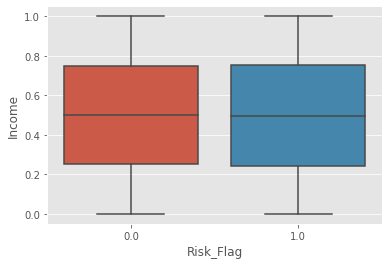

In [73]:
#understanding the relationship between the different data features.
sns.boxplot(x ="Risk_Flag",y="Income" ,data = df)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

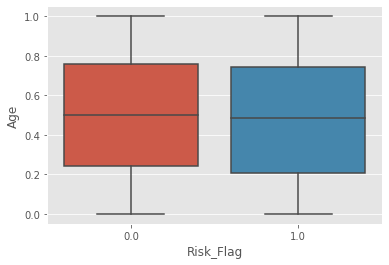

In [74]:
#relationship between the flag variable and age.
sns.boxplot(x ="Risk_Flag",y="Age" ,data = df)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

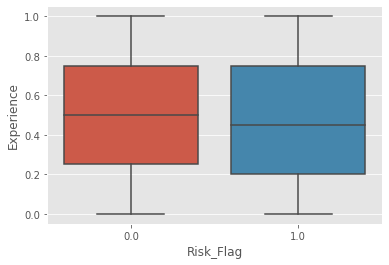

In [75]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = df)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

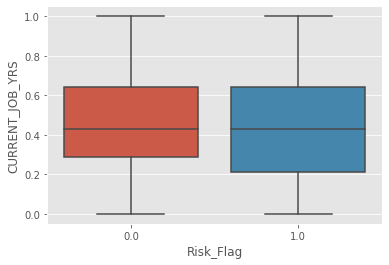

In [76]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = df)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

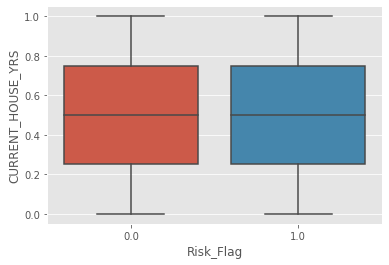

In [77]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = df)

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

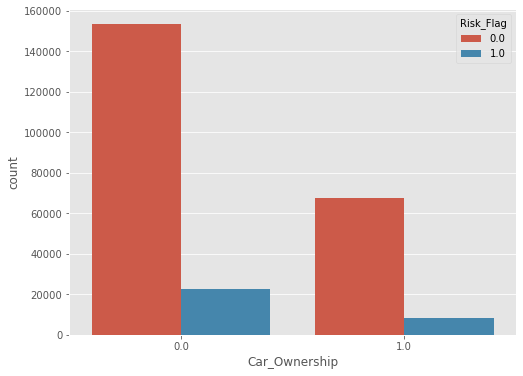

In [78]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=df)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

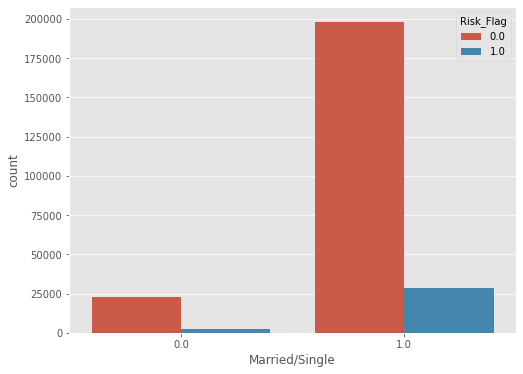

In [79]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=df )

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

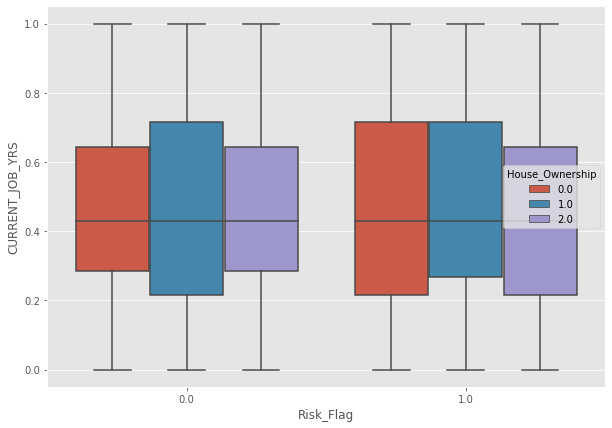

In [80]:
fig, ax = plt.subplots( figsize = (10,7) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = df)

## ENCODING CATEGORICAL COLUMN TO NUMERICAL COLUMN

In [39]:
from sklearn.preprocessing import OrdinalEncoder, normalize

In [40]:
columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']
encoder = OrdinalEncoder()

df[columns] = encoder.fit_transform(df[columns])

In [41]:
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1.0,2.0,0.0,33.0,3,13,0
1,7574516,40,10,1.0,2.0,0.0,43.0,9,13,0
2,3991815,66,4,0.0,2.0,0.0,47.0,4,10,0
3,6256451,41,2,1.0,2.0,1.0,43.0,2,12,1
4,5768871,47,11,1.0,2.0,0.0,11.0,3,14,1


In [42]:
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


## SCALING

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()

In [45]:
scaler.fit(df[numerical_feature])

MinMaxScaler()

In [46]:
df[numerical_feature]=scaler.transform(df[numerical_feature])

In [47]:
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,1.891722,0.301587,25.276746,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.391880,0.458948,14.728537,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,2.000000,0.000000,13.000000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,2.000000,0.000000,26.000000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,2.000000,1.000000,38.000000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,50.000000,1.000000,1.000000,1.000000


## DATA MODELLING

In [50]:
indep_feature=df.drop("Risk_Flag",axis=1)

In [51]:
dep_feature=df["Risk_Flag"]

In [52]:
print(indep_feature)

          Income       Age  Experience  Married/Single  House_Ownership  \
0       0.129487  0.034483        0.15             1.0              2.0   
1       0.757206  0.327586        0.50             1.0              2.0   
2       0.398564  0.775862        0.20             0.0              2.0   
3       0.625263  0.344828        0.10             1.0              2.0   
4       0.576454  0.448276        0.55             1.0              2.0   
...          ...       ...         ...             ...              ...   
251995  0.815303  0.379310        0.65             1.0              2.0   
251996  0.283620  0.086207        0.50             1.0              2.0   
251997  0.451682  0.431034        0.35             1.0              2.0   
251998  0.650356  0.413793        0.00             1.0              2.0   
251999  0.906933  0.844828        0.85             1.0              2.0   

        Car_Ownership  Profession  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  
0                 0.0      

In [53]:
print(dep_feature)

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
251995    0.0
251996    0.0
251997    0.0
251998    0.0
251999    0.0
Name: Risk_Flag, Length: 252000, dtype: float64


## Splitting the data into train and test

In [54]:
X = indep_feature
y = dep_feature

In [55]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

In [56]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((201600, 9), (201600,), (50400, 9), (50400,))

## LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_model=LogisticRegression(class_weight = "balanced")
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [59]:
# Test the model on the test data
accuracy = log_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Test accuracy:  0.5104563492063492


In [100]:
y_pred=log_model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)


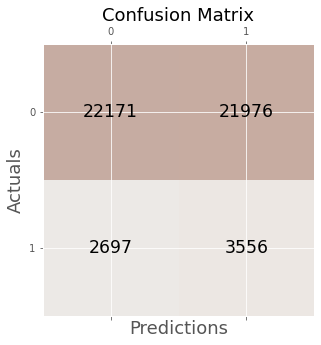

In [104]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [105]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 56.8687
Precision: 13.9276
F1-Score: 22.3753
Accuracy score: 51.0456
AUC Score: 53.5448


## RANDOM FOREST CLASSIFIER 

In [84]:
#Now, we train the model and perform the predictions.
from sklearn.ensemble import RandomForestClassifier

In [87]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [90]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [91]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8988095238095238


In [93]:
from sklearn.metrics import confusion_matrix

In [95]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)


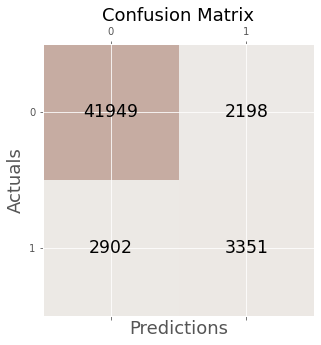

In [96]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.5903
Precision: 60.3893
F1-Score: 56.787
Accuracy score: 89.881
AUC Score: 74.3057
